# Diabetes Dataset Exploratory Data Analysis (EDA)

This notebook explores the **Diabetes dataset**, a classic regression problem. It consists of 10 baseline variables (age, sex, body mass index, average blood pressure, and six blood serum measurements) measured for 442 diabetes patients, along with a quantitative measure of disease progression one year after baseline.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## 1. Load Data and Initial Exploration

In [4]:
# Load data
def load_diabetes_data():
    data = load_diabetes()
    X, y = data.data, data.target
    feature_names = data.feature_names
    return X, y, feature_names

X, y, feature_names = load_diabetes_data()

print("=== DIABETES DATASET EXPLORATORY ANALYSIS ===")
print(f"Dataset shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of features: {len(feature_names)}")
print(f"Features: {list(feature_names)}")
print(f"Problem type: Regression")

# Create DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

df.info()

=== DIABETES DATASET EXPLORATORY ANALYSIS ===
Dataset shape: (442, 10)
Target shape: (442,)
Number of features: 10
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Problem type: Regression
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## 2. Basic Statistics and Missing Values

In [3]:
# Basic statistics
print("\n=== BASIC STATISTICS ===")
print("Features statistics:")
print(df[feature_names].describe())

print("\nTarget statistics:")
print(f"Mean: {y.mean():.2f}")
print(f"Std: {y.std():.2f}")
print(f"Min: {y.min():.2f}")
print(f"Max: {y.max():.2f}")
print(f"Median: {np.median(y):.2f}")

# Check for missing values
print("\n=== MISSING VALUES ===")
print(f"Missing values in features: {df.isnull().sum().sum()}")
print(f"Missing values in target: {pd.isnull(y).sum()}")

# Check for infinite values
print("\n=== INFINITE VALUES ===")
print(f"Infinite values in features: {np.isinf(X).sum()}")
print(f"Infinite values in target: {np.isinf(y).sum()}")


=== BASIC STATISTICS ===
Features statistics:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    

## 3. Target Distribution Analysis


=== TARGET DISTRIBUTION ===


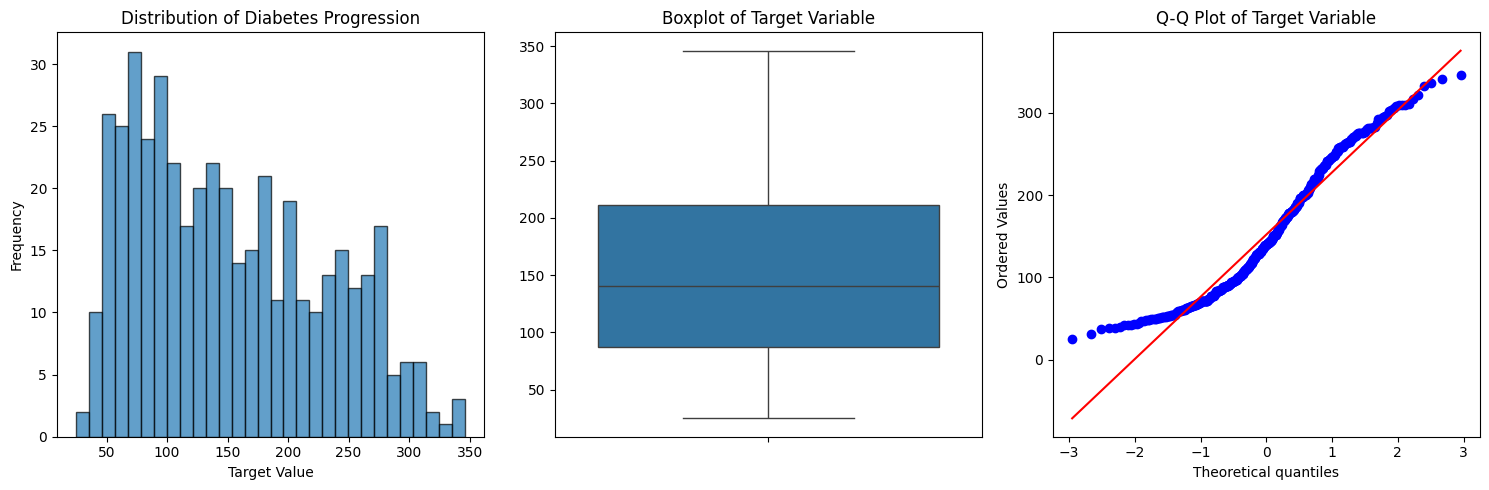

In [5]:
# Target distribution
print("\n=== TARGET DISTRIBUTION ===")
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(y, bins=30, alpha=0.7, edgecolor='black')
plt.title('Distribution of Diabetes Progression')
plt.xlabel('Target Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.boxplot(y=y)
plt.title('Boxplot of Target Variable')

plt.subplot(1, 3, 3)
stats.probplot(y, dist="norm", plot=plt)
plt.title('Q-Q Plot of Target Variable')

plt.tight_layout()
plt.show()

## 4. Feature Distributions and Outliers


=== FEATURE DISTRIBUTIONS ===


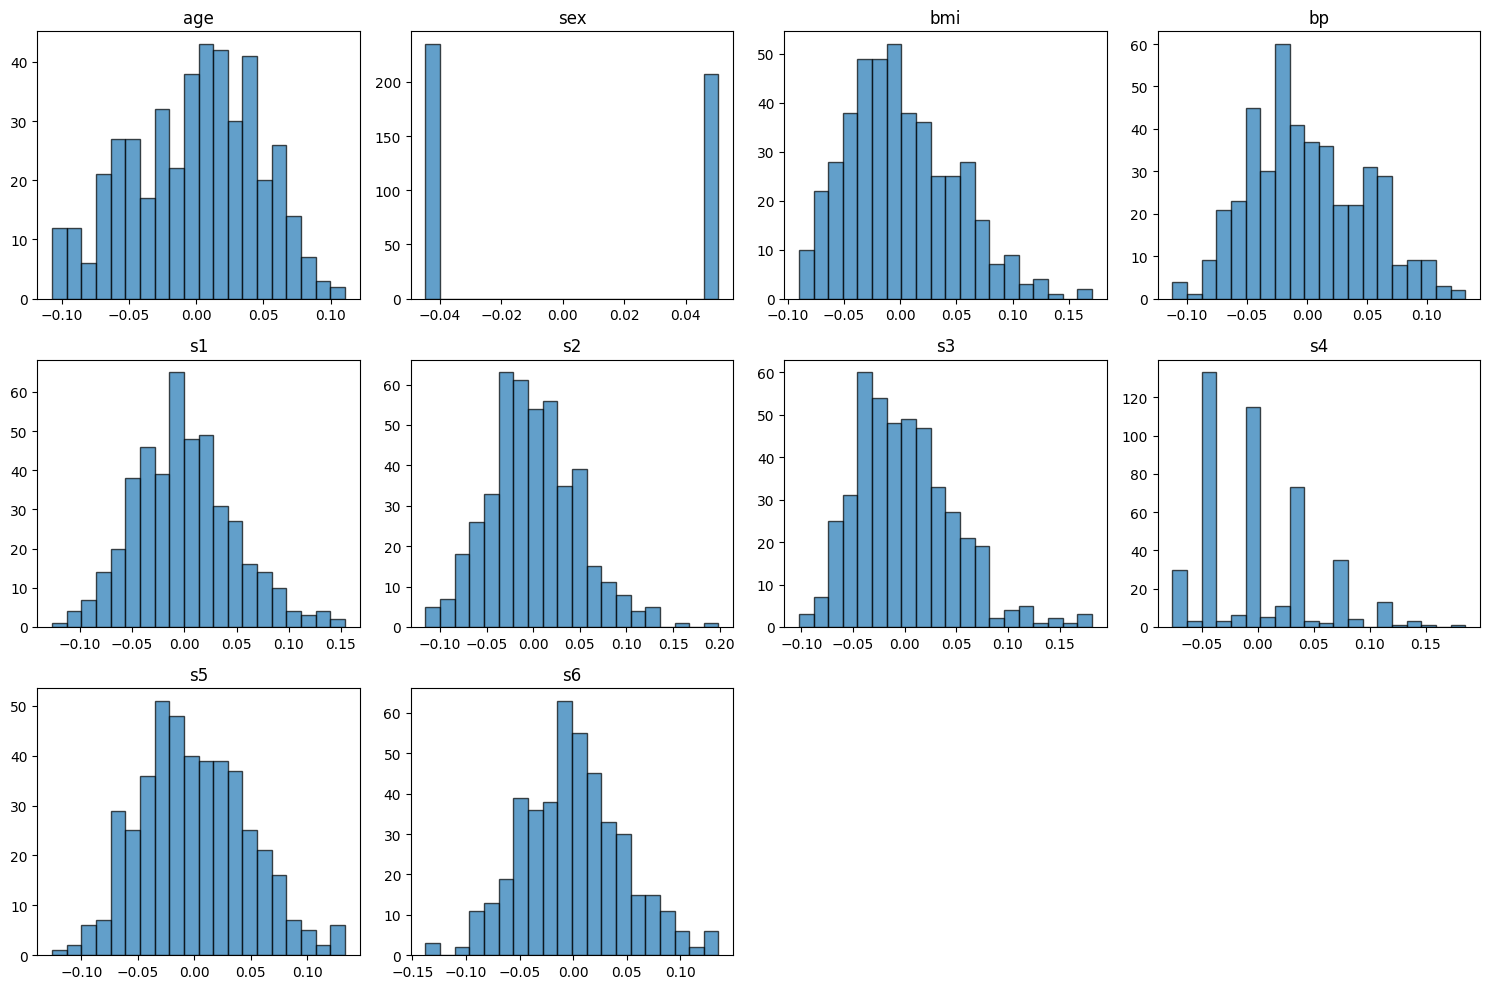


=== OUTLIER DETECTION ===


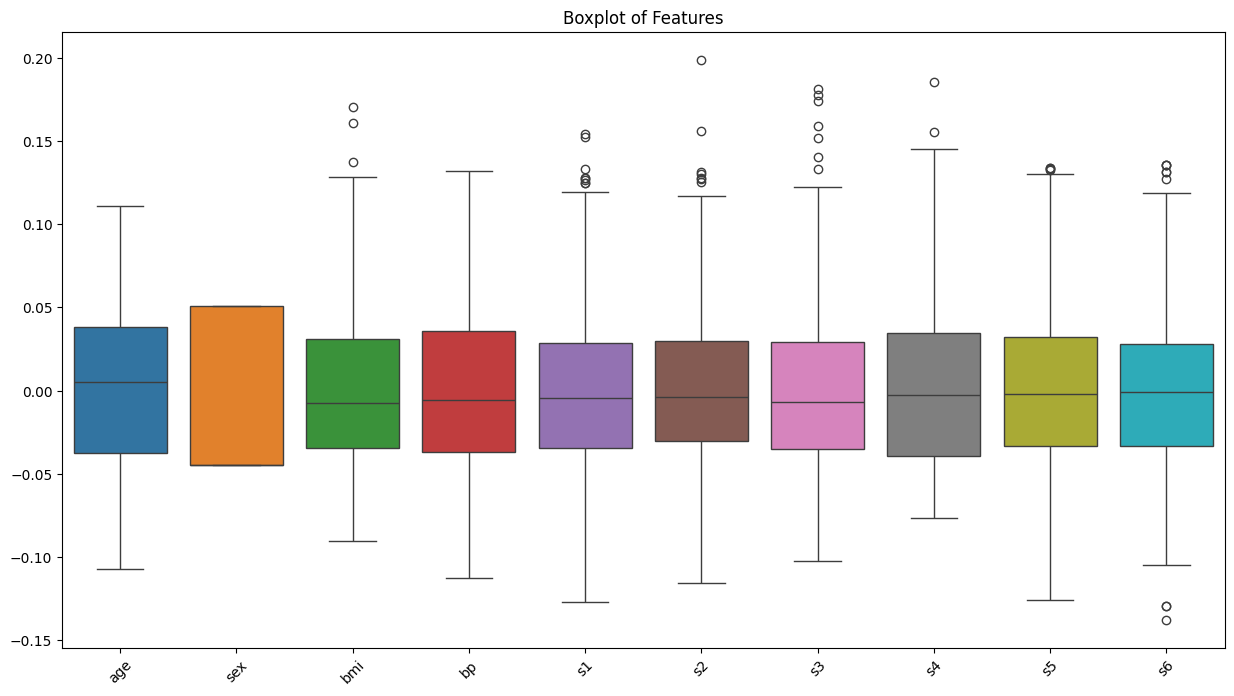

In [6]:
# Feature distributions
print("\n=== FEATURE DISTRIBUTIONS ===")
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(3, 4, i+1)
    plt.hist(X[:, i], bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'{feature_names[i]}')
plt.tight_layout()
plt.show()

# Outlier detection
print("\n=== OUTLIER DETECTION ===")
plt.figure(figsize=(15, 8))
df_features = df.drop('target', axis=1)
sns.boxplot(data=df_features)
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()

## 5. Correlation Analysis


=== CORRELATION WITH TARGET ===
Correlation with target:
bmi: 0.586
s5: 0.566
bp: 0.441
s4: 0.430
s6: 0.382
s1: 0.212
age: 0.188
s2: 0.174
sex: 0.043
s3: -0.395


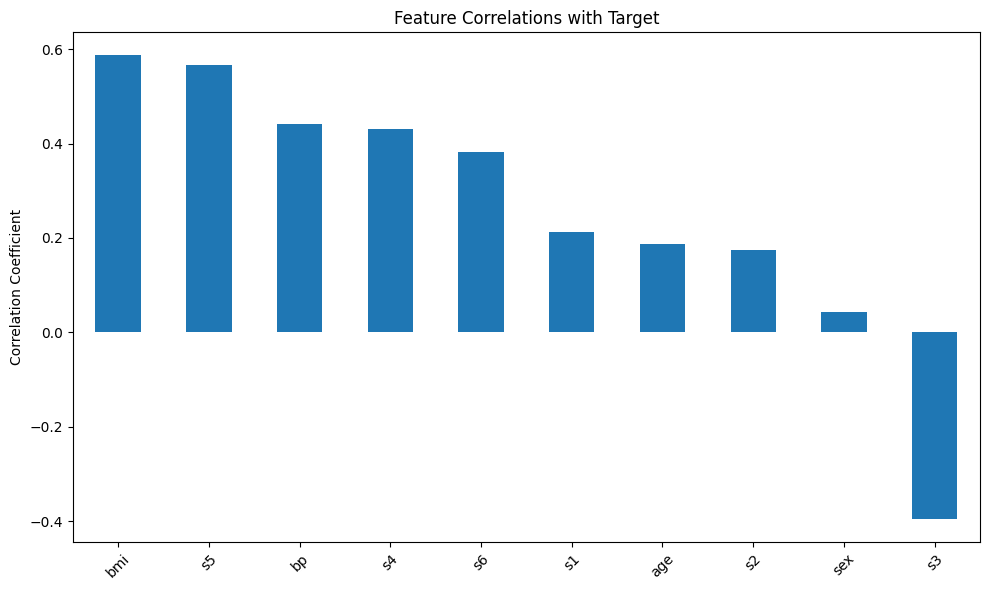


=== FEATURE CORRELATION MATRIX ===


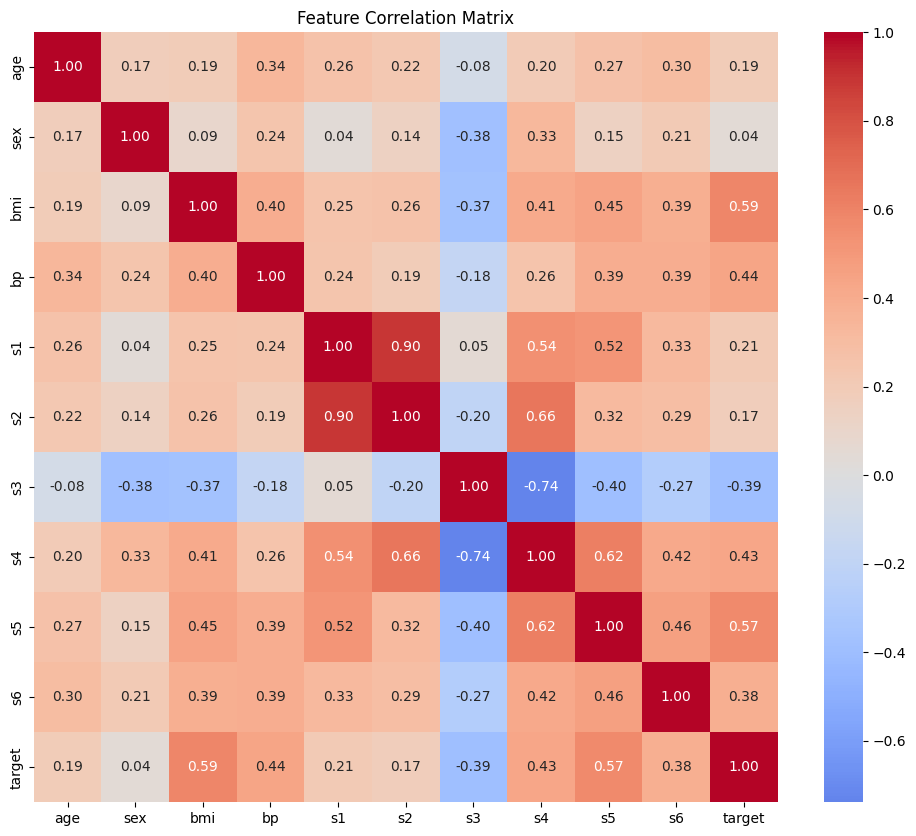

In [7]:
# Correlation with target
print("\n=== CORRELATION WITH TARGET ===")
correlations = df.corr()['target'].sort_values(ascending=False)
print("Correlation with target:")
for feature, corr in correlations.items():
    if feature != 'target':
        print(f"{feature}: {corr:.3f}")

plt.figure(figsize=(10, 6))
correlations.drop('target').plot(kind='bar')
plt.title('Feature Correlations with Target')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation matrix
print("\n=== FEATURE CORRELATION MATRIX ===")
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()